# Data Mining Project on Diabete

## <font color="green"> Librairies <font>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

## <font color="green"> Data Description <font>

In [39]:
data = pd.read_csv("diabetes_dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [41]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [42]:
data.isna().sum()
#There is no null value in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color="green"> Data Preprocessing <font>

In [43]:
#Some Values like glucose,bloodpressure etc. can not be at 0, we have to change them.
data.eq(0).sum()  

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [44]:
#We change the values of the table by the mean of the column
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN) 
data.fillna(data.mean(),inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


## <font color="green"> Data Exploration <font> 

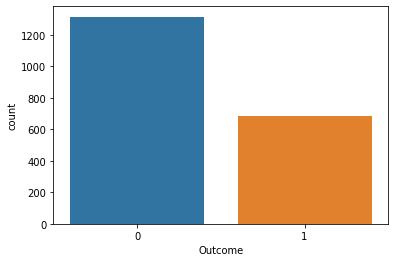

0    65.8
1    34.2
Name: Outcome, dtype: float64

In [45]:
#The proportion of people having diabete in the dataset
data["Outcome"].value_counts()            
sns.countplot(x="Outcome", data=data)    
plt.show()
100 * data["Outcome"].value_counts() / len(data)

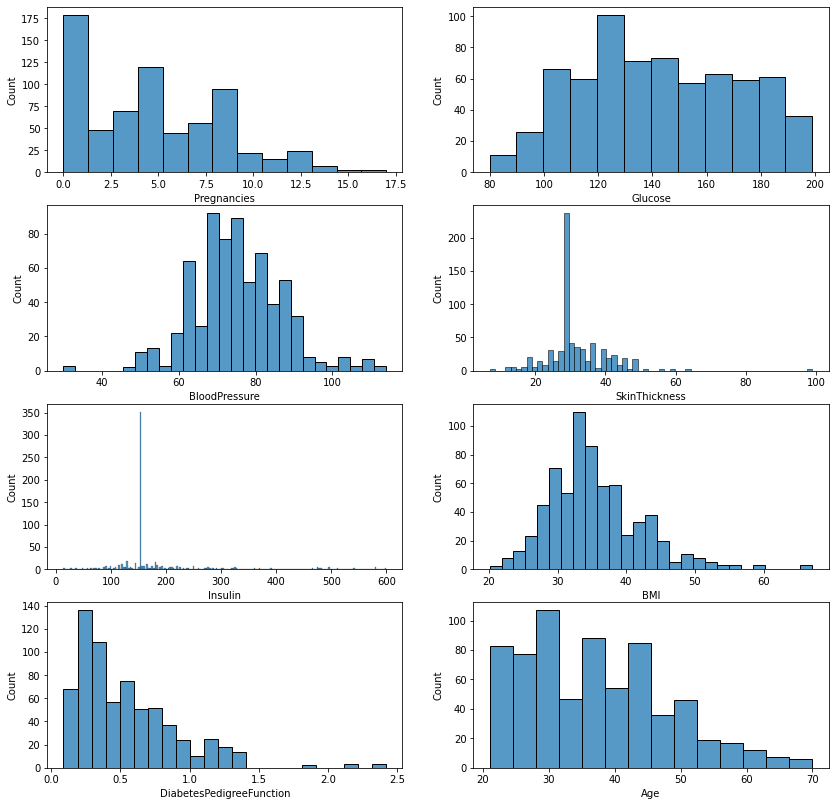

In [46]:
fig=plt.figure(figsize=(14,14))
newdata=data[data['Outcome'] == 1]
for i,col in enumerate(newdata.drop(['Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    sns.histplot(newdata[col])

## <font color="green"> Data Visualization <font> 


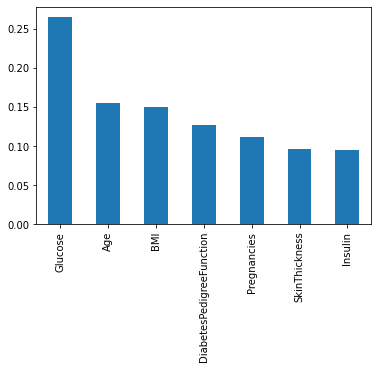

In [47]:
#Showing the order of importance of some features for better visualization
x=data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction']]
y=data.iloc[:,8]
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

In [48]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121537,0.197878,0.087605,0.054230,0.011288,-0.025453,0.539457,0.224437
Glucose,0.121537,1.000000,0.199323,0.208309,0.406556,0.232654,0.124141,0.259805,0.488020
BloodPressure,0.197878,0.199323,1.000000,0.202983,0.073310,0.259240,0.012074,0.323335,0.174481
SkinThickness,0.087605,0.208309,0.202983,1.000000,0.179486,0.517663,0.091822,0.133270,0.205527
Insulin,0.054230,0.406556,0.073310,0.179486,1.000000,0.187411,0.096155,0.089810,0.207696
BMI,0.011288,0.232654,0.259240,0.517663,0.187411,1.000000,0.142016,0.018455,0.282182
DiabetesPedigreeFunction,-0.025453,0.124141,0.012074,0.091822,0.096155,0.142016,1.000000,0.026569,0.155459
Age,0.539457,0.259805,0.323335,0.133270,0.089810,0.018455,0.026569,1.000000,0.236509
Outcome,0.224437,0.488020,0.174481,0.205527,0.207696,0.282182,0.155459,0.236509,1.000000


<AxesSubplot:>

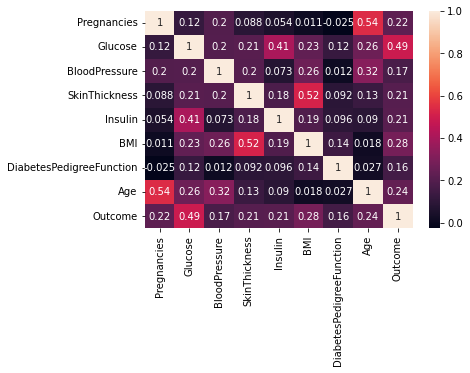

In [49]:
sns.heatmap(data.corr(),annot=True)

## <font color="green"> Train and Test Dataset <font> 

In [50]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

xTrain,xTest,yTrain,yTest= train_test_split(x,y,test_size=0.15,random_state=20)

## <font color="green"> Clustering <font> 

In [51]:
kmeans = KMeans(n_clusters=2, random_state=40,max_iter=10000, n_init=100).fit(x)
kmeans.labels_
count = 0
for first,second in zip(y,kmeans.labels_):
    if first==second:
        count+=1

print("Accuracy: ",(count / len(y)) * 100)

Accuracy:  65.8


## <font color="green"> Classification <font> 

In [52]:
lr = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knn = KNeighborsClassifier().fit(xTrain,yTrain)
dt = DecisionTreeClassifier().fit(xTrain,yTrain)
rf = RandomForestClassifier().fit(xTrain,yTrain)
gbm = GradientBoostingClassifier().fit(xTrain,yTrain)
modelsc = [lr,gnb,knn,dt,rf,gbm]

In [53]:
# comparison
results=[]
names=["logisticRegression","gaussianNB","Knn","DecisionTree","RandomForest","GradientBoosting"]
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    print("\n"+ name + ": ")
    print("-" * 25)
    print("f1score",f1_score(predict, yTest, average="micro"))


LogisticRegression: 
-------------------------
f1score 0.7266666666666666

GaussianNB: 
-------------------------
f1score 0.7333333333333333

KNeighborsClassifier: 
-------------------------
f1score 0.8166666666666667

DecisionTreeClassifier: 
-------------------------
f1score 0.98

RandomForestClassifier: 
-------------------------
f1score 0.97

GradientBoostingClassifier: 
-------------------------
f1score 0.8766666666666667


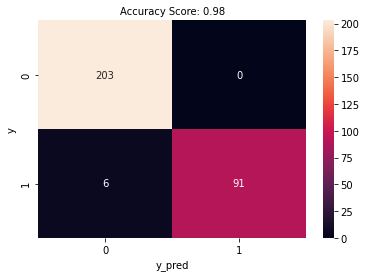

In [54]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    conf_matrix = confusion_matrix(y, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(yTest,dt.predict(xTest))

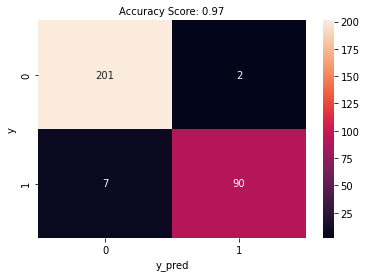

In [55]:
plot_confusion_matrix(yTest,rf.predict(xTest))